# confusion_matrix

Run via papermill with something like this:
```
papermill confusion_matrix.ipynb get-random-bounding-boxes/reports/job27/job27-turkle-results.ipynb -y "
TURKLE_RESULTS_CSV_PATH: get-random-bounding-boxes/reports/job27/job27-turkle-results.csv"
```

In [1]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
TURKLE_RESULTS_CSV_PATH = 'get-random-bounding-boxes/reports/job27/job27-turkle-results.csv'

In [3]:
# Parameters
TURKLE_RESULTS_CSV_PATH = "get-random-bounding-boxes/reports/job28/job28-turkle-results.csv"


In [4]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
#     import matplotlib.pyplot as plt
#     import numpy as np
#     import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel(f'Human label ({human_name})')
    plt.xlabel('Machine label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# plot_confusion_matrix(cm           = np.array([[ 1098,  1934,   807],
#                                               [  604,  4392,  6233],
#                                               [  162,  2362, 31760]]), 
#                       normalize    = False,
#                       target_names = ['high', 'medium', 'low'],
#                       title        = "Confusion Matrix")

# Main

In [5]:
df = pd.read_csv(TURKLE_RESULTS_CSV_PATH)
df.head(1)

,HITId,HITTypeId,Title,CreationTime,MaxAssignments,AssignmentDurationInSeconds,AssignmentId,WorkerId,AcceptTime,SubmitTime,WorkTimeInSeconds,Input.image,Answer.answer,Answer.note,Turkle.Username
0,206,2,roadside,Tue Jul 21 05:52:51 UTC 2020,1,86400,37,2,Tue Jul 21 05:53:49 UTC 2020,Tue Jul 21 05:54:05 UTC 2020,16,https://raw.githubusercontent.com/aubreymoore/...,zero,NaN,aubreymoore


In [6]:
human_name = df['Turkle.Username'][0]
df.rename({'Input.image':'image_url', 'Answer.answer':'human'}, axis='columns', inplace=True)
df['machine'] = df.apply(lambda r: r.image_url.split('/')[-1].split('-')[0], axis='columns')
df = df.filter(['image_url', 'machine', 'human'], axis='columns')
df

,image_url,machine,human
0,https://raw.githubusercontent.com/aubreymoore/...,medium,zero
1,https://raw.githubusercontent.com/aubreymoore/...,zero,light
2,https://raw.githubusercontent.com/aubreymoore/...,zero,light
3,https://raw.githubusercontent.com/aubreymoore/...,zero,zero
4,https://raw.githubusercontent.com/aubreymoore/...,light,light
5,https://raw.githubusercontent.com/aubreymoore/...,medium,medium
6,https://raw.githubusercontent.com/aubreymoore/...,zero,medium
7,https://raw.githubusercontent.com/aubreymoore/...,high,medium
8,https://raw.githubusercontent.com/aubreymoore/...,medium,medium
9,https://raw.githubusercontent.com/aubreymoore/...,medium,medium


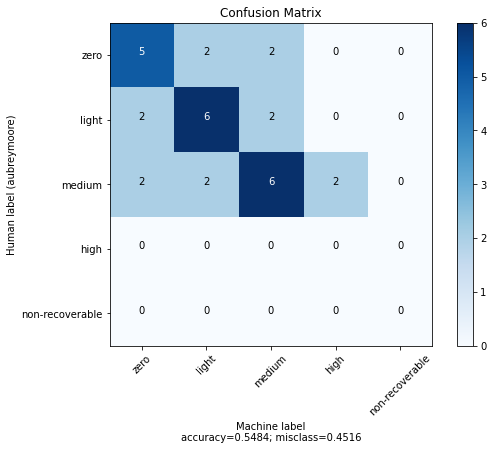

In [7]:
labels = ['zero','light','medium','high','non-recoverable']
cm = metrics.confusion_matrix(list(df.human), list(df.machine), labels=labels)
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = labels,
                      title        = "Confusion Matrix")